# 3.6 Convolution

## 3.6.1 Review of the Laplace method

The ultimate goal of the Laplace method is to find an output signal as a function of time  
The process hinges on the Laplace transform, the Transfer function, and the equation  
  
$$y(s)=H(s)\cdot x(s)$$  
The key is multiplication in the frequency domain

### 3.6.1.1 Find the Transfer function

The drawing below includes some new information,  
but also highlights the entire process of the Laplace transform method  
  
To start the Laplace transform method, we need to find the transfer function  
It is found by writing the relationships between power conjugate variable in the frequency domain,  
and then including them in a conservation law, such as Kirchhoff's laws or D'Alembart's principle  
  
In this specific drawing, the transfer function is highlighted in red as the starting point of the process  
![image1!](./images_s3/image_3_6_1.png)  

### 3.6.1.2 Transform the input

The next step in the process, is to transform the input signal to the frequency domain  
  
Our input signals have been limited to the singularity functions; the impulse, step, and ramp  
along with the exponential (real or imaginary for sin/cos waves)  
Although any input signal for which you can find the Laplace transform will work for this step  
  
The drawing below shows the Laplace tranform of the input signal highlighted in red  
![image2!](./images_s3/image_3_6_2.png)  

### 3.6.1.3 Multiply in the frequency domain

Once we have the transfer function and the input signal in the frequency domain,  
we can multiply to find the output  
  
The drawing below highlights this portion of the Laplace method in red  
![image3!](./images_s3/image_3_6_3.png)  

### 3.6.1.4 Convert back to the time domain

The final step in the process is to convert the output signal from the frequency domain  
back to the time domain using the inverse laplace transform  
  
Once again, the final step is shown in red  
![image4!](./images_s3/image_3_6_4.png)  

## 3.6.2 Convolution in the time domain

You can see in the drawing above, there is a way compute the output signal  
completely in the time domain!  
  
So why don't we do that?  
  
It turns out that the frequency dependent knowledge of a system  
is usually more important than calculating the output signal  
  
> Designing a filter or control system is about knowing the frequency response  
In practice, you won't even know what the input signal is  

> For example, the input signal may come from an accelerometer attached to an automobile bridge  
All you want to do is condition the signal so you can make measurements with a microntroller  
in order to detect if the bridge is maintaining it's safety requirements  
In this example, you have no idea of what the actual input signal will be as a function of time  
and the computation of the output signal as a function of time is unimportant,  
but the design of the frequency response of the system is crucial  
In other words, you must design the natural frequencies of the system so it performs properly
  
Beyond the frequency response being more important than the time response,  
the calculation in the time domain involves calculus, not algebra  
  
> Convolution is an integration of time domain signals, it's not as simple as multiplication  
you can't simply multiply signals in the time domain, that's a non-linear process  

### 3.6.2.1. Find the unit impulse response

The first step in the convolution method is to find the unit impulse response  
  
You should take a moment to reflect on the difference with the Laplace method  
the convolution method requires a response as a function of time, not a set of differntial equations  
In the Laplace method $H(s)$ is the frequency representaion of differential equations  
  
The unit impulse response is usually found by using the inverse Laplace transform of $H(s)$,  
alternatively, you could measure the unit impulse response of a system in the lab  
  
Either way, the drawing below shows the starting point of the convolution method below  
![image5!](./images_s3/image_3_6_5.png)  

### 3.6.2.2 Perform the convolution integral

The formula for the convolution integral is  
[Convolution](https://en.wikipedia.org/wiki/Convolution)
  
$$y(t)=h(t)*x(t)=\int_{-\infty}^{\infty} h(t-\tau)x(\tau)d\tau$$  
We will explain how to perform this integral a little later, but recognize it's not as simple  
as muliplying the input signal and the impulse response  
  
Convolving in the time domain is similar to multiplying in the frequency domain  
and in fact the convolution operation can be transformed to multiplication using the Laplace transform  
  
$$\mathcal{L}\left\{{h(t)*x(t)}\right\}=H(s)\cdot x(s)$$
The symbol for convolution is an asterik, *  
  
The diagram below shows how the convolution operation is used to   
complete the process of finding the output signal as a function of time  
![image6!](./images_s3/image_3_6_6.png)  

## 3.6.3 Performing convolution

Traditionally, the process of convolving two signals was carried out on graph paper,  
but today computers can perform the operation  
  
We will show you the graphical method, but will use Python to solve the actual integral  

### 3.6.3.1 Find $h(t)$

First, let's create a unit impulse response, $h(t)$  
We will do this by starting with a simple transfer function  
  
$$H(s)=\frac{3}{s+3}$$  
Because we need to investigate the term $h(t-\tau)$, we will find $h(t)$  
by looking it up in the Laplace transform table  
  
$$h(t)=3e^{-3t}$$  
  
The code cell below plots $h(t)$ as a function of time

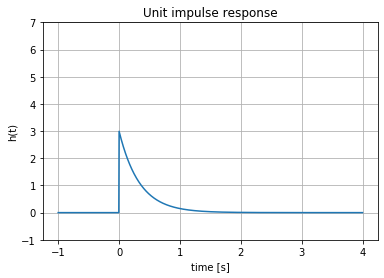

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def unit_impulse_response(t):
    if t<0:
        return 0
    else:
        return(3*np.exp(-3*t))

t_axis = np.linspace(-1, 4, 1000)
h_t = []
for t in t_axis:
    h_t.append(unit_impulse_response(t))

plt.plot(t_axis, h_t)
plt.ylim([-1,7])
plt.xlabel('time [s]')
plt.ylabel('h(t)')
plt.title('Unit impulse response')
plt.grid()

### 3.6.3.2 Find $h(t-\tau)$

The convolution integral is repeated below  
  
$$y(t)=h(t)*x(t)=\int_{-\infty}^{\infty} h(t-\tau)x(\tau)d\tau$$  
The integration is performed over the variable $\tau$, not $t$  
  
This means that while this integral is calculated, $t$ remains constant  

So what does the term $h(t-\tau)$ mean?  
  
The easiest way to show it, is to make a graph of $h(t-\tau)$, with t constant  
In the code cell below, $t$ is held at a constant value of 2 seconds,  
while $\tau$ is varied across the entire time-axis

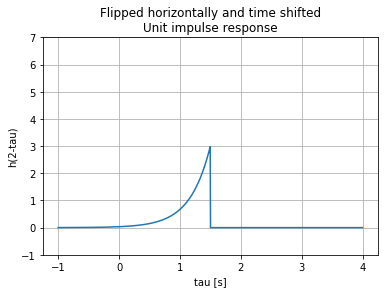

In [2]:
h_t_m_tau = []
t = 1.5
for tau in t_axis:
    h_t_m_tau.append(unit_impulse_response(t-tau))

plt.plot(t_axis, h_t_m_tau)
plt.ylim([-1,7])
plt.xlabel('tau [s]')
plt.ylabel('h(2-tau)')
plt.title('Flipped horizontally and time shifted\nUnit impulse response')
plt.grid()

The term $h(t-\tau)$, flips the function horizontally around the $\tau=0$ axis  
and then shifts it along the axis by the amount of time, $t$. In this case, $t=1.5$ seconds

### 3.6.3.3 Define $x(t)$ and change the variable to $x(\tau)$

Any function of time may be used for $x(t)$,  
so for our example, we will use a pulse from 1 to 2 seconds  
  
Notice, you don't need to know how to take the Laplace transform of this function!  
but you do need to change the variable from $t$ to $\tau$  

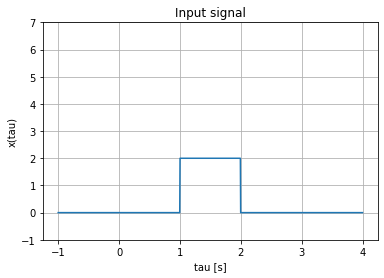

In [3]:
x_tau = np.zeros(1000)
x_tau[400:599] = 2.0

plt.plot(t_axis, x_tau)
plt.ylim([-1,7])
plt.xlabel('tau [s]')
plt.ylabel('x(tau)')
plt.title('Input signal')
plt.grid()

### 3.6.3.4 Find $h(t-\tau)x(\tau)$

Before we integrate, we must first find the product of the input  
with the flipped and time shifted transfer function  
  
The integral is the area under the curve  
Pay attention to the time limits for the integral and the x-axis  
the x-axis is $\tau$, while time, $t$, is fixed at one value

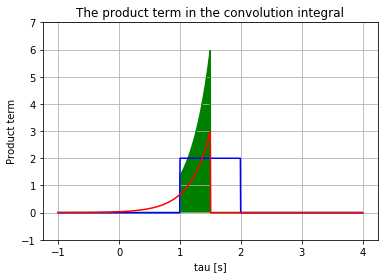

In [4]:
p = h_t_m_tau*x_tau

plt.plot(t_axis, p, 'g')
plt.fill(t_axis, p, 'g')
plt.plot(t_axis, x_tau, 'b')
plt.plot(t_axis, h_t_m_tau, 'r')

plt.ylim([-1,7])
plt.xlabel('tau [s]')
plt.ylabel('Product term')
plt.title('The product term in the convolution integral')
plt.grid()

### 3.6.3.5 Find $y(t)=\int h(t-\tau)x(\tau)d\tau$

In our example, we are finding the output at time $t=1.5s$  
The area of the green fill in the graph above gives us the answer  
  
$y(1.5)=1.554$

In [6]:
import scipy.integrate as integrate

y_1_5 = integrate.simps(p, t_axis)
print('y(1.5) =',y_1_5)

y(1.5) = 1.554394635767819


### 3.6.3.6 Repeat at more values of $t$ to find $y(t)$

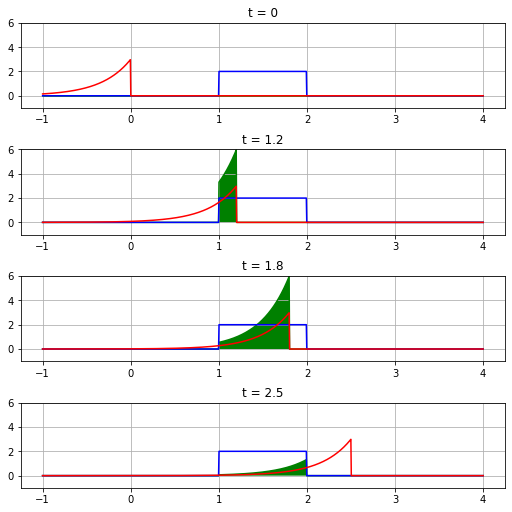

In [74]:
p = [[], [], [], []]
t = [0.0, 1.2, 1.8, 2.5]
t_titles = ['t = 0', 't = 1.2', 't = 1.8', 't = 2.5']
h_t_m_tau = [[], [], [], []]
for n in range(4):
    for tau in t_axis:
        h_t_m_tau[n].append(unit_impulse_response(t[n]-tau))
    p[n] = h_t_m_tau[n]*x_tau

t_titles = ['t = 0', 't = 1.2', 't = 1.8', 't = 2.5']
fig, ax = plt.subplots(4, constrained_layout=True, figsize=(7,7))

for n in range(4):
    ax[n].plot(t_axis, p[n], 'g')
    ax[n].fill(t_axis, p[n], 'g')
    ax[n].plot(t_axis, x_tau, 'b')
    ax[n].plot(t_axis, h_t_m_tau[n], 'r')
    ax[n].set_ylim([-1,6])
    ax[n].set_title(t_titles[n])
    ax[n].grid()

## 3.6.4 Using Scipy to perform convolution

The code cells above show you the steps in performing convolution, but 
as you may imagine, the steps are coded in a method provided by Scipy  
[Convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html#scipy.signal.convolve)
  
Convolution is communitive, $h(t)*x(t)=x(t)*h(t)$  
so the order you put the functions in the method does not matter  
  
The code cell below uses Scipy to perform convolution  
The values determined from the step-by-step method are superimposed on the graph  

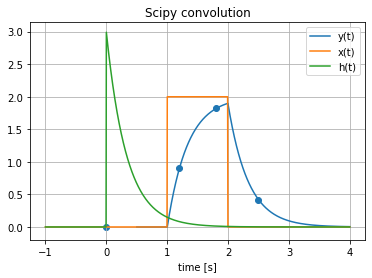

In [73]:
import scipy.signal as sig

# it only takes one line of code to perform convolution!
# the output needs to be scaled by the summation of all the values in h(t)
# mode='same', causes the output array to be the same size as the input array
y_t = sig.convolve(x_tau, h_t, mode='same')/sum(h_t)

# for comparison, integrate the area under the curves
# from the figures above
y = []
for n in range(4):
    y.append(integrate.simps(p[n], t_axis))

plt.plot(t_axis[300:], y_t[:700])
plt.plot(t_axis, x_tau)
plt.plot(t_axis, h_t)
plt.scatter(t, y)
plt.xlabel('time [s]')
plt.title('Scipy convolution')
plt.legend(['y(t)', 'x(t)', 'h(t)'])
plt.grid()

## 3.6.5 Convolution in Machine Learning

A class of machine learning called convolutional neural networks (CNN),  
gets its name from employing the convolution operation within its network layers  
[Convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network)
  
This type of machine learning is often applied to image recognition  
It is essentially a filter that is "trained" or "weighted" to recognize a feature of interest  
  
Because it is applied to images, the filter is a two-dimensional spatial array  
rather than a one-dimensional time array as we have seen  
  
Because images are large and many convolutions are required,  
processing power is of the utmost importance  
In such cases, the impulse response, $h(t)$,  
of the filter is typically approximated by a very simple function  
In convolutional neural networks, the filter is called a kernel  
  
The link below explains convolutional neural networks as applied to image processing  
and includes a graphic showing the filter sliding across the image, just as we have shown in the graphs above  
[CNN](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)  
  
A snapshot of that graphic is shown here  
![image7!](./images_s3/image_3_6_7.png)  
The 3x3 kernel can fit into 9 different places on the image  
for each of the 9 places, the kernel is multiplied by the image data and then added up (integrated)  
The answer goes into one of the 3x3 locations of the output signal...  
it's convolution in action!

## 3.6.6 Convolution versus the Laplace method

Now we see there are two ways to do the same thing  
Use convolution to perform the calculation completely in the time domain  
or, use the Laplace method to perform the calculation  
  
Obviously, one path is computationally faster that the other  
but it isn't obvious which one is faster  
GPUs are currently being designed to foster better performance of the brute force convolutional method  
  
Scipy even provides a method to help you decide  
(The method compares Convolution to the Fourier transfrom method  
The Fourier transform method is very similar to the Laplace transform method  
If you remember from the Fourier series discussion, the Fourier transform  
converts the signal to the $s=j\omega$ axis, rather than the s-plane as the Laplace transform does)  
  
The code cell below finds out which method is faster on your machine!

In [75]:
print('Which is faster, direct or fft? =', sig.choose_conv_method(x_tau, h_t, mode='same'))

Which is faster, direct or fft? = direct
